**Set environment**

In [3]:
suppressMessages(suppressWarnings(source("../config_sing.R")))

print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


In [8]:
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

txt = paste("head", fpath)
system(txt, intern=TRUE)

[1] "371718546\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input1_20x/Input1.bedpe"
 [2] "18666630\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input1/Input1.bedpe"     
 [3] "347635732\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input2_20x/Input2.bedpe"
 [4] "20167924\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input2/Input2.bedpe"     
 [5] "349994051\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input3_20x/Input3.bedpe"
 [6] "23280988\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input3/Input3.bedpe"     
 [7] "413508358\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input4_20x/Input4.bedpe"
 [8] "19003938\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input4/Input4.bedpe"     
 [9] "341110487\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input5_20x/Input5.bedpe"
[10] "15325016\t/gpfs/fs1/data/reddylab/Kuei/out/proj_combeffect/source/Input5/Input5.bedpe"

## Import library size

In [18]:
###################################################
# Import library size
###################################################

### Helper function to get
get_sample = function(idn_sample){
    idn = idn_sample
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_sample(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input_20x
18666630,Input1,Input
347635732,Input2_20x,Input_20x
20167924,Input2,Input
349994051,Input3_20x,Input_20x
23280988,Input3,Input
413508358,Input4_20x,Input_20x
19003938,Input4,Input
341110487,Input5_20x,Input_20x


## Visualize and compare sequencing depth

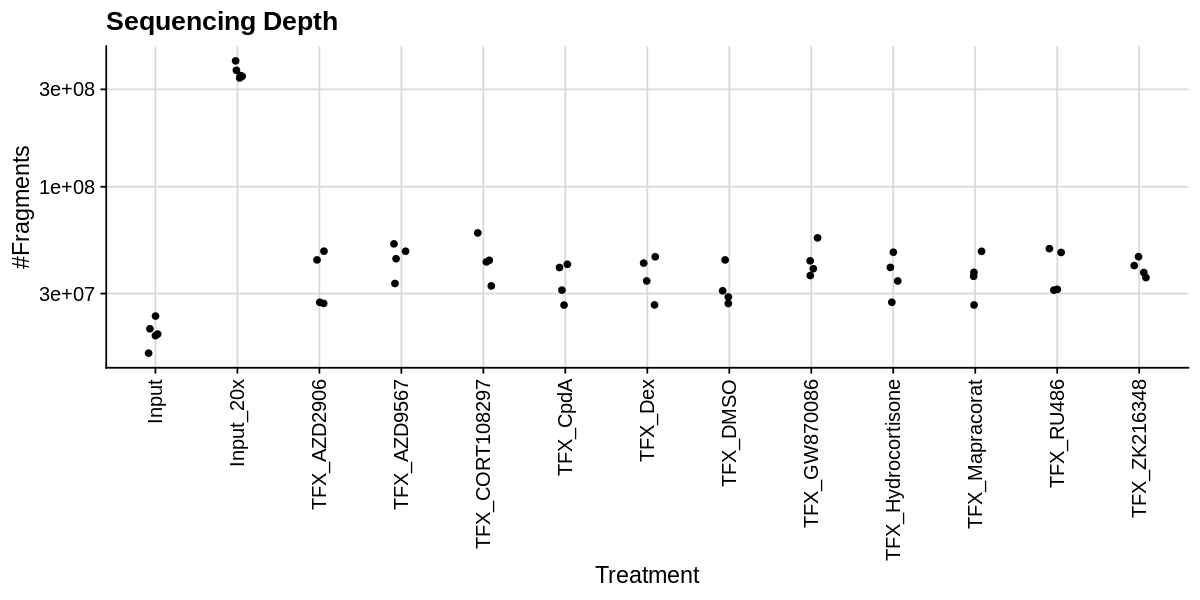

In [32]:
dat = dat_lib

options(repr.plot.width=10, repr.plot.height=5)
set.seed(123)
ggplot(dat, aes(x=Group, y=Size)) + 
    geom_jitter(width=0.1) + 
    labs(x="Treatment", y="#Fragments", title="Sequencing Depth") +
    scale_y_log10() +
    theme_cowplot() +
    background_grid() +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))